#7DaysOfCode - Machine Learning Day-1: Collecting Data and Exploratory Data Analysis is correct?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
spotify_df = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/GitHub/7DaysOfCode_SpotifyML/data/dataset.csv")

In [3]:
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
spotify_df.shape

(114000, 21)

In [5]:
#dropping Unnamed: column
spotify_df = spotify_df.drop(columns = ['Unnamed: 0'])

In [6]:
#checking for null values
spotify_df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

There is only 3 missing values in the entire dataset, and I chose to simply drop that data point.

In [7]:
spotify_df = spotify_df.dropna()

In [8]:
#checking for duplicates
spotify_df.duplicated().sum()

450

In [9]:
#dropping it
spotify_df = spotify_df.drop_duplicates()

In [10]:
#correcting Dtype
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

In [11]:
#convert song_duration from ms to minutes
spotify_df['duration_ms'] = spotify_df['duration_ms']/60000

# EDA


In [12]:
spotify_df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,113549.0,33.324433,22.283855,0.0000,17.000000,35.000000,50.0000,100.00000
duration_ms,113549.0,3.801356,1.773552,0.1431,2.903067,3.550000,4.3598,87.28825
danceability,113549.0,0.567031,0.173409,0.0000,0.456000,0.580000,0.6950,0.98500
energy,113549.0,0.642091,0.251053,0.0000,0.473000,0.685000,0.8540,1.00000
key,113549.0,5.309452,3.560147,0.0000,2.000000,5.000000,8.0000,11.00000
loudness,113549.0,-8.243408,5.011422,-49.5310,-9.998000,-6.997000,-5.0010,4.53200
mode,113549.0,0.637866,0.480620,0.0000,0.000000,1.000000,1.0000,1.00000
speechiness,113549.0,0.084674,0.105762,0.0000,0.035900,0.048900,0.0845,0.96500
acousticness,113549.0,0.314064,0.331906,0.0000,0.016800,0.168000,0.5960,0.99600
instrumentalness,113549.0,0.155703,0.309217,0.0000,0.000000,0.000041,0.0487,1.00000


- One interesting observation is the low mean value of popularity at 33. Considering that Spotify ranks popularity on a scale of 0 to 100, this suggests that most songs in the dataset, at least in this analysis, may not be very popular and may go relatively unnoticed. In fact, only the top third quartile, representing the top 25% of the distribution, have a popularity score above 50.
- The majority of songs have a duration of around 3 minutes, with the longest songs ranging around 4 minutes. However, there is one outlier with a duration of 87 minutes, which seems unusually long for a typical song.
- The valence attribute, which indicates the "happiness" or positivity of a song, has a relatively low mean value of 0.4. This raises an interesting question: do people tend to compose more sad or melancholic songs, given the lower valence values observed in the dataset?


In [13]:
spotify_df.describe(include='object').T

,count,unique,top,freq
track_id,113549,89740,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113549,31437,The Beatles,279
album_name,113549,46589,Alternative Christmas 2022,195
track_name,113549,73608,Run Rudolph Run,151
track_genre,113549,114,acoustic,1000


- The Beatles appear to be a popular choice in the dataset, with a total of 279 songs featuring their music.
- It's interesting to note that there are 151 songs named "Run Rudolph Run" in the dataset. "Run Rudolph Run" is a Christmas song originally written by Chuck Berry, and it has been covered by numerous other artists over the years.
- Additionally, in the Christmas theme, the most frequent album name is "Alternative Christmas 2022".


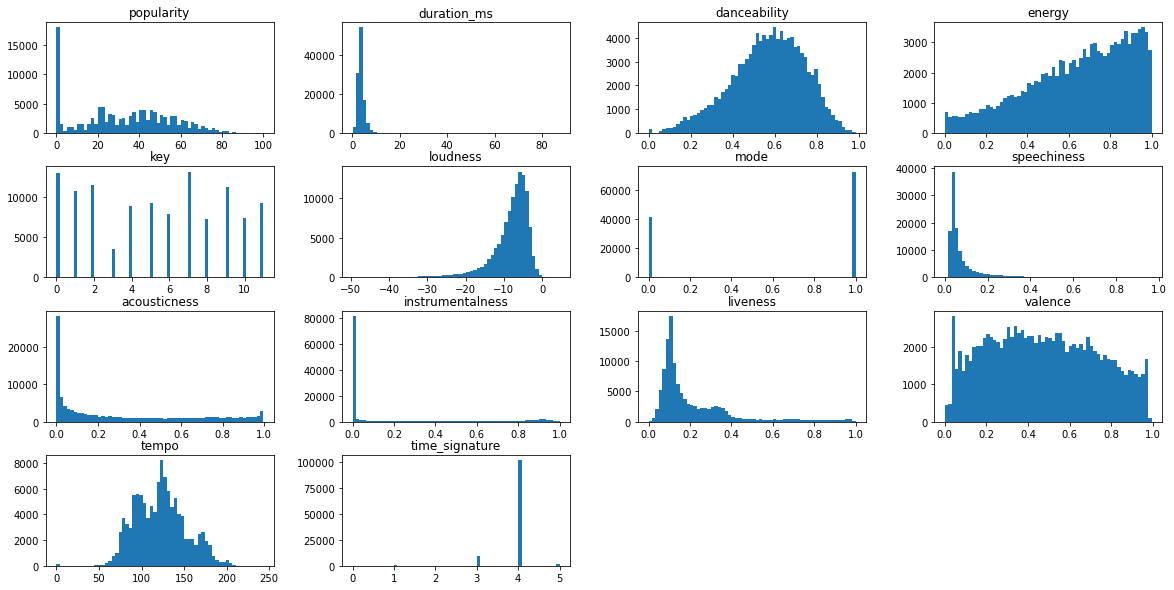

In [14]:
spotify_df.hist(bins=60, grid=False, figsize=(20,10))
plt.show()

- The histograms provide further confirmation of our initial analysis of popularity: there is a peak around low values, with a large number of songs ranging between 0-10 in popularity.
- The distribution of duration_ms clearly shows the presence of outliers, as indicated by the heavily skewed distribution.
- Danceability and tempo appear to follow normal distributions, as indicated by their histogram distributions.
- Liveness and speechiness are right-skewed, while loudness and energy are left-skewed, as evident from their respective histograms.
- Valence, on the other hand, appears to follow a uniform distribution, as observed from its histogram.

Overral, we can see that:

i. Popularity: The majority of songs in the sample have low popularity values, with a peak around 0-10. This suggests that the songs in the dataset may not be widely popular or well-known.

ii. The normal distribution shape of danceability and tempo indicates that these attributes are evenly distributed across the sample, suggesting that the songs in the dataset have similar danceability and tempo characteristics.

iii. Liveness, Speechiness, Loudness, and Energy: The skewness of these attributes' distributions (right-skewed for liveness and speechiness, left-skewed for loudness and energy) suggests that the songs in the dataset tend to have lower liveness and speechiness values, but higher loudness and energy values on average.

iv. Valence: The uniform distribution of valence indicates that the songs in the sample have a relatively balanced distribution of happiness or positive emotions.

## Looking for outliers

In [15]:
spotify_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

[Text(0, 1, '')]

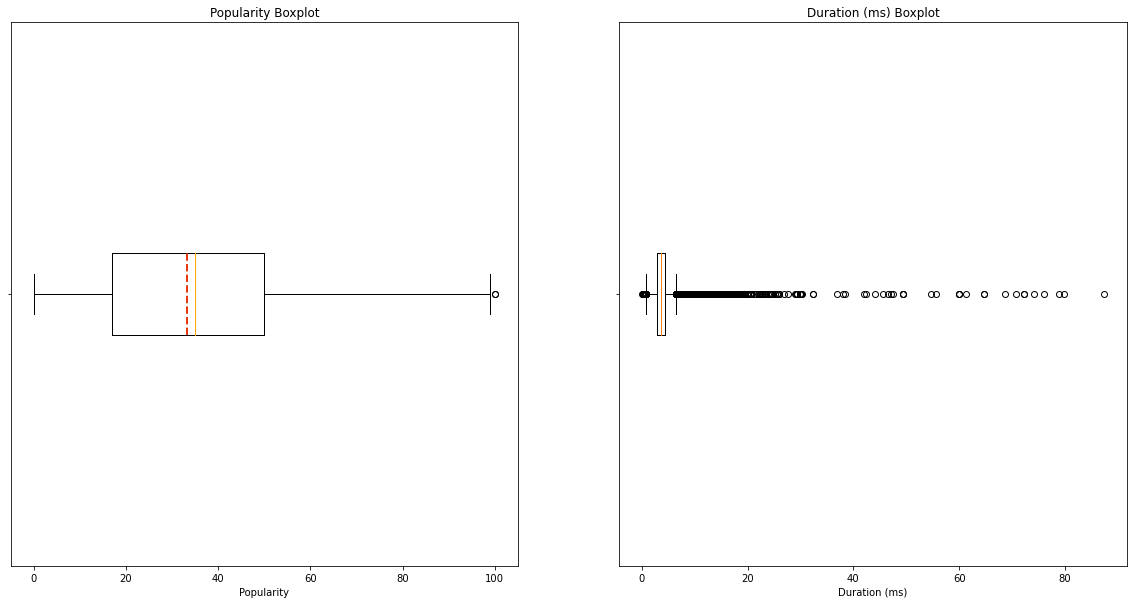

In [16]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Boxplot for 'popularity' column
axes[0].boxplot(spotify_df['popularity'], vert=False, meanline=True, showmeans=True,
                medianprops=dict(color='orange'), meanprops=dict(color='#E83810', linewidth=2))
axes[0].set_title('Popularity Boxplot')
axes[0].grid(False)
axes[0].set_xlabel('Popularity')
axes[0].set_yticklabels([]) # Remove y-axis labels

# Boxplot for 'duration_ms' column
axes[1].boxplot(spotify_df['duration_ms'], vert=False)
axes[1].set_title('Duration (ms) Boxplot')
axes[1].grid(False)
axes[1].set_xlabel('Duration (ms)')
axes[1].set_yticklabels([]) # Remove y-axis labels

Based on the duration distribution in the dataset, it appears that most songs have durations of under 10 minutes, but there are songs with unusually long durations ranging from 10 to 20 minutes, and even over 1 hour. This suggests that there may be songs with diverse lengths and styles, including longer compositions or experimental tracks, present in the dataset.

In [17]:
spotify_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

<AxesSubplot:>

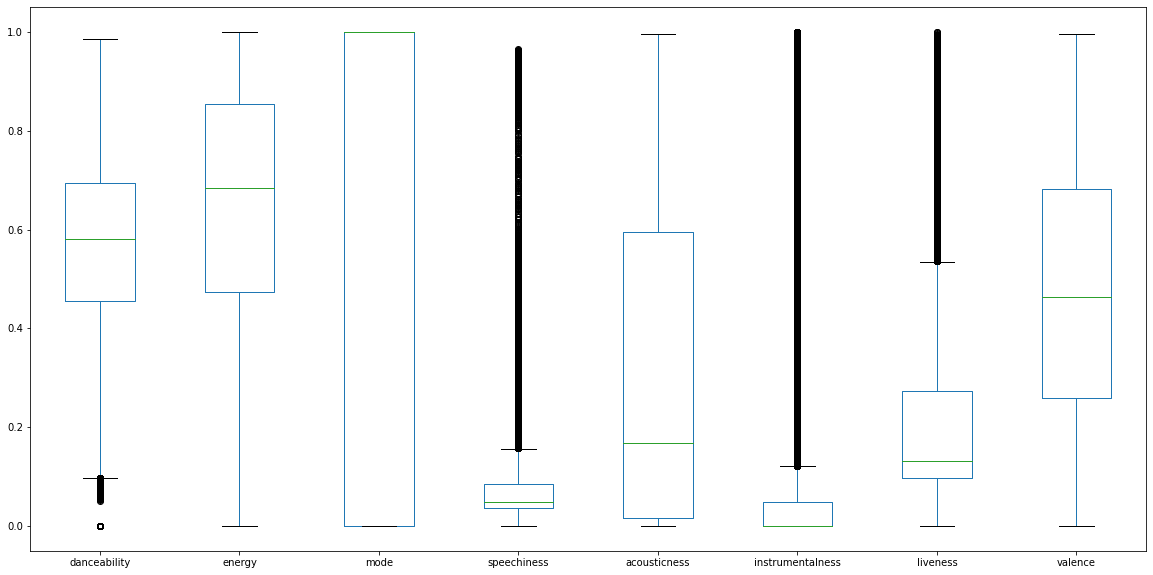

In [18]:
spotify_df.boxplot(column= ['danceability', 'energy',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence'],figsize=(20,10),grid=False )

Based on the boxplots, it appears that speechiness, instrumentalness, and liveness have a high number of data points that fall outside the interquartile range (IQR), indicating the presence of numerous outliers in these attributes. These outliers could represent songs that exhibit unusual or distinct characteristics in terms of their speechiness, instrumentalness, or liveness. 

## Exploring trends

In [19]:
spotify_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

### Top 10 most popular tracks

In [20]:
#top 10 most popular tracks
spotify_df.sort_values(by=['popularity'], ascending=False)[['track_name', 'artists', 'track_id', 'popularity']].head(10)

,track_name,artists,track_id,popularity
81051,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,3nqQXoyQOWXiESFLlDF1hG,100
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,3nqQXoyQOWXiESFLlDF1hG,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,2tTmW7RDtMQtBk7m2rYeSw,99
68303,La Bachata,Manuel Turizo,5ww2BF9slyYgNOk37BlC4u,98
81210,I'm Good (Blue),David Guetta;Bebe Rexha,4uUG5RXrOk84mYEfFvj3cK,98
67356,La Bachata,Manuel Turizo,5ww2BF9slyYgNOk37BlC4u,98
88410,La Bachata,Manuel Turizo,5ww2BF9slyYgNOk37BlC4u,98
30003,I'm Good (Blue),David Guetta;Bebe Rexha,4uUG5RXrOk84mYEfFvj3cK,98
89411,La Bachata,Manuel Turizo,5ww2BF9slyYgNOk37BlC4u,98
20008,I'm Good (Blue),David Guetta;Bebe Rexha,4uUG5RXrOk84mYEfFvj3cK,98


It appears that even after dropping duplicates, some still remain in the dataset. To further clean the data, I will try specifying the 'track_id' as the unique identifier for each song. Since the 'track_id' should be unique for each track, this approach may help resolve the issue of duplicates. Duplicates in the 'track_id' column could arise from various reasons, such as multiple versions or releases of the same song, remixes, or discrepancies in data sources. By using the 'track_id' as a unique identifier and removing duplicates based on this column, I can ensure that I have a clean and distinct representation of each song in the dataset, which will contribute to more accurate analysis and visualization.

In [21]:
spotify_df.drop_duplicates(subset='track_id', keep='first', inplace=True)


In [22]:
spotify_df.shape

(89740, 20)

In [23]:
#top 10 most popular tracks
spotify_df.sort_values(by=['popularity'], ascending=False)[['track_name', 'artists', 'track_id', 'popularity']].head(10)

,track_name,artists,track_id,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,3nqQXoyQOWXiESFLlDF1hG,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,2tTmW7RDtMQtBk7m2rYeSw,99
20008,I'm Good (Blue),David Guetta;Bebe Rexha,4uUG5RXrOk84mYEfFvj3cK,98
67356,La Bachata,Manuel Turizo,5ww2BF9slyYgNOk37BlC4u,98
67358,Me Porto Bonito,Bad Bunny;Chencho Corleone,6Sq7ltF9Qa7SNFBsV5Cogx,97
67359,Tití Me Preguntó,Bad Bunny,1IHWl5LamUGEuP4ozKQSXZ,97
67559,Efecto,Bad Bunny,5Eax0qFko2dh7Rl2lYs3bx,96
20000,Under The Influence,Chris Brown,5IgjP7X4th6nMNDh4akUHb,96
79000,I Ain't Worried,OneRepublic,4h9wh7iOZ0GGn8QVp4RAOB,96
81052,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,95


That's better. It's evident that Bad Bunny has gained significant popularity in recent times.

### Top 10 artists by popularity

There is no column that explicitly indicates an artist's popularity in the given dataset. To determine the popularity of an artist, I have considered artists who have a significant number of songs with a popularity score of over 50. The threshold of 50 is chosen based on the 3rd quartile of the popularity scores of the songs, which indicates a relatively high level of popularity. Hence, artists with the most songs that exceed this popularity threshold are considered popular in this analysis.

In [24]:
#top 10 artists by popularity
popular_songs = spotify_df[spotify_df['popularity'] > 50]
artist_popularity = popular_songs.groupby("artists").count()["popularity"]
artist_popularity_sorted = artist_popularity.sort_values(ascending=False)
popular_artists = artist_popularity_sorted.head(10)

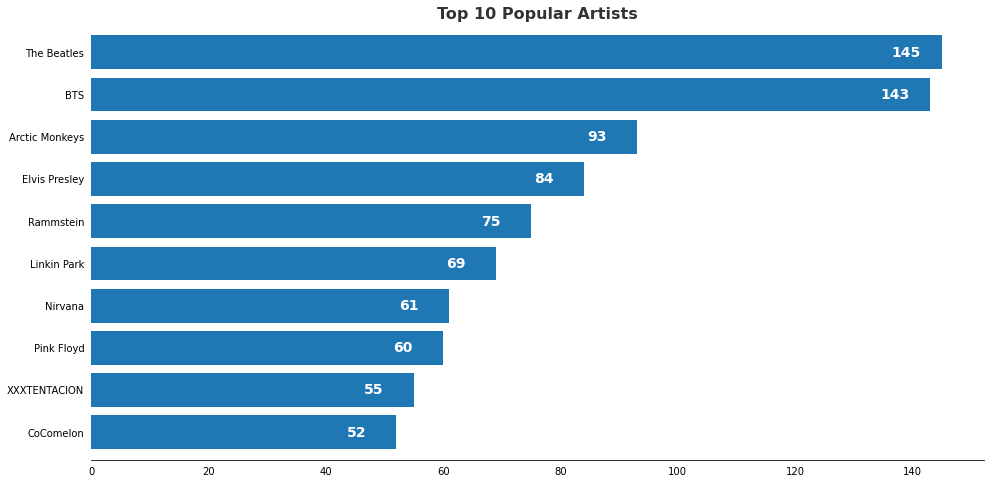

In [25]:
def generate_horizontal_bar_chart(df, title):
    """
    Generate a horizontal bar chart with annotations.

    Args:
        df (pd.DataFrame): Input dataframe.
        title (str): Title of the plot.

    Returns:
        None
    """
    # Sort the dataframe by the values in ascending order
    df_sorted = df.sort_values(ascending=True)

    # Create the horizontal bar chart
    plot = df_sorted.plot(kind='barh', xlabel='', figsize=(16, 8), width=0.8)

    # Set the title and other plot properties
    plt.title(title, size=16, alpha=0.8, weight='bold')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom=False, left=False)

    rects = plot.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = -50
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.0f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha,
            color='white',
            weight='bold',
            size=14)
    plt.show()


generate_horizontal_bar_chart(popular_artists, 'Top 10 Popular Artists')

In [26]:
spotify_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

### Top 5 longest songs

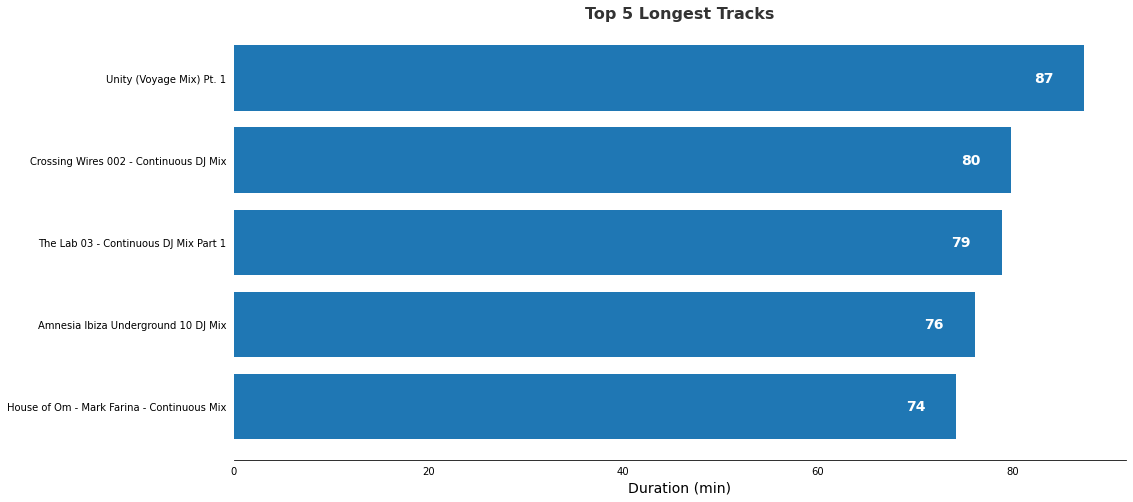

In [27]:
#top 5 longest songs
def generate_horizontal_bar_chart(df, title):
    """
    Generate a horizontal bar chart with annotations.

    Args:
        df (pd.DataFrame): Input dataframe.
        title (str): Title of the plot.

    Returns:
        None
    """
    # Sort the dataframe by the 'duration_ms' column in descending order
    df_sorted = df.sort_values(by='duration_ms', ascending=True)

    # Create the horizontal bar chart
    plot = df_sorted.plot(kind='barh',  xlabel='',x='track_name', y='duration_ms', figsize=(16, 8), width=0.8, legend=False)

    # Set the title and other plot properties
    plt.title(title, size=16, alpha=0.8, weight='bold')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom=False, left=False)
    plt.xlabel('Duration (min)', fontsize=14) # Add x-axis label for duration

    rects = plot.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = -50
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.0f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha,
            color='white',
            weight='bold',
            size=14)
    plt.show()
longest_tracks = spotify_df.sort_values(by=['duration_ms'], ascending=False)[['track_name', 'duration_ms']].head(5)
generate_horizontal_bar_chart(longest_tracks, 'Top 5 Longest Tracks')


### Most popular genres

In [28]:
#how many genres there are in the data
genre_stats = spotify_df.groupby('track_genre').agg({"popularity":np.nanmean, "track_genre": "count"})

genre_stats.columns = ['popularity_mean', 'count']

common_genres = genre_stats.sort_values(by=['count'], ascending=False).head(10)

common_genres

,popularity_mean,count
track_genre,,
acoustic,42.483000,1000
alt-rock,33.896897,999
tango,19.866867,999
ambient,44.208208,999
afrobeat,24.407407,999
cantopop,34.753754,999
bluegrass,25.681363,998
forro,41.831663,998
study,26.128257,998


By examining the data, we can observe that the most common genres, in terms of frequency, may not necessarily be the most popular genres. To determine the popularity of genres, we can group them together and calculate the average popularity of tracks within each genre. This approach provides insights into the genres that have the highest average popularity among the tracks in the dataset.

In [29]:
#top 10 most popular genres in average
top_10_genres = spotify_df.groupby('track_genre').agg({"popularity":np.nanmean, "track_genre": "count"}).sort_values(by=['popularity'], ascending=False).head(10)

top_10_genres.columns = ['popularity_mean', 'count']

top_10_genres = top_10_genres.reset_index()

In [30]:
top_10_genres

,track_genre,popularity_mean,count
0,k-pop,59.423581,916
1,pop-film,59.096933,815
2,metal,56.422414,232
3,chill,53.738683,972
4,latino,51.788945,398
5,sad,51.109929,564
6,grunge,50.587007,862
7,indian,49.765348,733
8,anime,48.776884,995
9,emo,48.500000,932


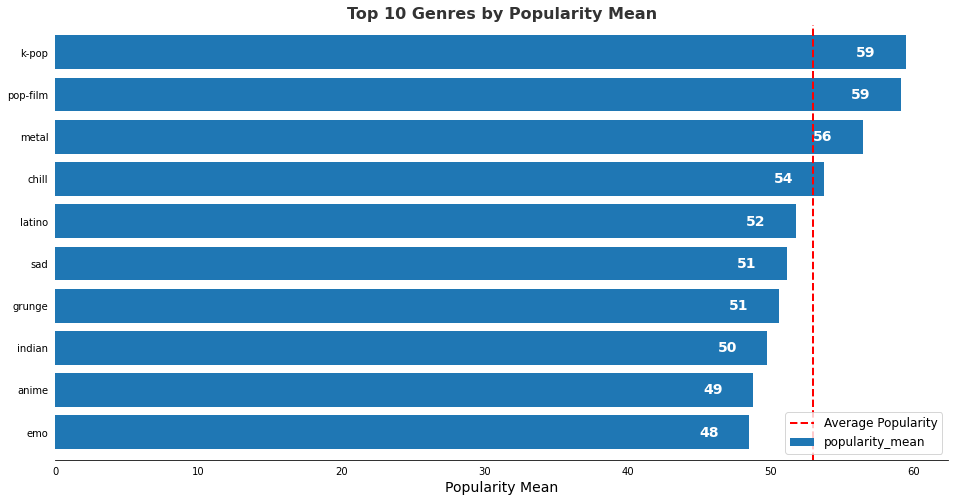

In [31]:

def generate_horizontal_bar_chart(df, title):
    """
    Generate a horizontal bar chart with annotations.

    Args:
        df (pd.DataFrame): Input dataframe.
        title (str): Title of the plot.

    Returns:
        None
    """
    # Sort the dataframe by the 'popularity_mean' column in descending order
    df_sorted = df.sort_values(by='popularity_mean', ascending=True)

    # Calculate the average popularity of the dataset
    avg_popularity = df['popularity_mean'].mean()

    # Create the horizontal bar chart
    plot = df_sorted.plot(kind='barh',  xlabel='',x='track_genre', y='popularity_mean', figsize=(16, 8), width=0.8, legend=False)

    # Set the title and other plot properties
    plt.title(title, size=16, alpha=0.8, weight='bold')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom=False, left=False)
    plt.xlabel('Popularity Mean', fontsize=14) # Add x-axis label for popularity mean

    rects = plot.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = -50
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.0f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha,
            color='white',
            weight='bold',
            size=14)

    # Add a horizontal line for the average popularity of the dataset
    plt.axvline(avg_popularity, color='red', linestyle='dashed', linewidth=2, label='Average Popularity')

    # Add a legend
    plt.legend(loc = 4,frameon= True, fontsize= 12)

    plt.show()

generate_horizontal_bar_chart(top_10_genres, "Top 10 Genres by Popularity Mean")



The horizontal bar chart illustrates the top 10 genres based on their popularity mean, with genres sorted in ascending order. Each bar represents the popularity mean of a genre, accompanied by annotations displaying the corresponding value at the end of each bar. The chart also features a red dashed line that indicates the average popularity of the dataset. Notably, genres such as k-pop, pop-film, metal, and chill not only exhibit popularity on their own, but also boast popularity means that surpass the dataset's average, indicating their higher level of popularity compared to other genres.

## Correlation

Correlation is a valuable tool for identifying relationships between variables, including the direction and strength of those relationships. For example, in the context of analyzing music popularity, correlation can be used to determine whether there is a positive or negative relationship between popularity and each audio feature, and to assess the strength of that relationship. By examining correlation coefficients, we can gain insights into how different audio features may influence music popularity, helping us understand the underlying patterns and trends in the data.

<AxesSubplot:>

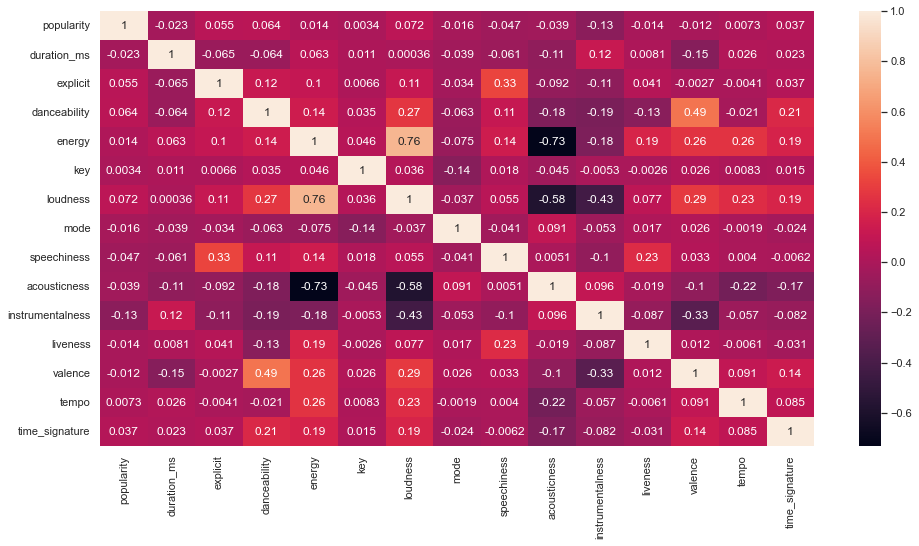

In [32]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.heatmap(spotify_df.corr(), annot=True)

The correlation analysis reveals interesting insights about the relationships between audio features. For example:
- There is a negative correlation between acousticness and energy, indicating that songs with higher acousticness tend to have lower energy. This relationship is intuitive, as acoustic songs are often associated with a more calm and relaxed vibe. 
- There is a positive but weak correlation (0.49) between valence and danceability, suggesting that songs with more positive tones are slightly more danceable. 
- However, when it comes to popularity, **there is no clear indication of a significant correlation with any of the audio features analyzed in the correlation map. This suggests that popularity may be influenced by other factors beyond the audio features considered in this analysis**.